The primary objectives are to analyze the dataset, identify factors driving
customer turnover, develop an accurate Machine Learning model to predict potential departures,
and recommend customized retention strategies. The company aims to save costs by retaining
customers, as acquiring new clients is significantly more expensive.Verizonet's executives are
optimistic that the insights and actions derived from this project will not only reduce attrition but
also contribute to the company's growth and financial stability.

 importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r"C:\Users\abhir\Downloads\verizonet_data.csv"
df = pd.read_csv(path)
df


,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,None,Yes,22.77,No,No,None,...,Landers,92285,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,None,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,None,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,NaN,NaN,0,0,NaN


Gives us a brief idea about the dataset  like the different columns and its values

Remove duplicate values from the data set

In [2]:
df = df.drop_duplicates()
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,None,Yes,22.77,No,No,None,...,Landers,92285,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,None,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,None,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,NaN,NaN,0,0,NaN


Use the info() method to obtain a brief description of the DataFrame that includes details about the non-null values and data types.

In [3]:
df.info

<bound method DataFrame.info of      Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0     8779-QRDMV                No                    0                 1   
1     7495-OOKFY               Yes                    1                 8   
2     1658-BYGOY                No                    0                18   
3     4598-XLKNJ               Yes                    1                25   
4     4846-WHAFZ               Yes                    1                37   
...          ...               ...                  ...               ...   
7038  2569-WGERO                No                    0                72   
7039  6840-RESVB               Yes                    1                24   
7040  2234-XADUH               Yes                    4                72   
7041  4801-JZAZL               Yes                    1                11   
7042  3186-AJIEK                No                    0                66   

        Offer Phone Service  Avg Monthly Lo

To provide a statistically informed view of a dataset, it's helpful to know what type of data you're working with.

In [4]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Zip Code,Population,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,93486.070567,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,1856.767505,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,90001.000000,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,92101.000000,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,93518.000000,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,95329.000000,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,96150.000000,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


printing the data type of all the column

In [5]:
column_data_types = df.dtypes
print(column_data_types)

Customer ID                           object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

print all the unique values in each column for that unique_values_per_column = {} dictionary is been decleared

In [6]:
#print unique values in each colum
unique_values_per_column = {}
for column in df.columns:
    unique_values = df[column].unique()
    unique_values_per_column[column] = unique_values

# Print or access unique values for each column
for column, values in unique_values_per_column.items():
    print(f"Unique values in {column}: {values}")

Unique values in Customer ID: ['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Unique values in Referred a Friend: ['No' 'Yes']
Unique values in Number of Referrals: [ 0  1  6  2  4  3  7  5  8  9 10 11]
Unique values in Tenure in Months: [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]
Unique values in Offer: ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
Unique values in Phone Service: ['No' 'Yes']
Unique values in Avg Monthly Long Distance Charges: [ 0.   48.85 11.33 ... 44.99 44.98  8.62]
Unique values in Multiple Lines: ['No' 'Yes']
Unique values in Internet Service: ['Yes' 'No']
Unique values in Internet Type: ['Fiber Optic' 'Cable' 'DSL' 'None']
Unique values in Avg Monthly GB Download: [ 9 19 57 13 15 20 33 26 21 32 31 12 10  8 16  2 11  6 14  0 30 29 24 28
 23 2

check the number of null values or missing values in each column

In [7]:
df.isna().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

CLTV stands for -Customer Lifetime Value

In [8]:
# Replace NaN with 'None' in 'Churn Category'
df['Churn Category'].fillna('None', inplace=True)

# Replace NaN with 'None' in 'Churn Reason'
df['Churn Reason'].fillna('None', inplace=True)


df['Customer Satisfaction rate'].fillna('Not rated ', inplace=True)

df


,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,Not rated
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,Not rated
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,Not rated
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,None,Yes,22.77,No,No,None,...,Landers,92285,2182,0,5306,None,None,0,0,Not rated
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,None,None,2,0,Not rated
7040,2234-XADUH,Yes,4,72,None,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,None,None,2,0,4.0
7041,4801-JZAZL,Yes,1,11,None,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,None,None,0,0,Not rated


Now to find the percentage customers who have churn 

In [9]:
total_churned = df.loc[df['Churn Status'] == 1].shape[0]
total_customers = df.shape[0]
churn_rate = (total_churned / total_customers) * 100
print("Churn rate =", churn_rate)

Churn rate = 26.536987079369588


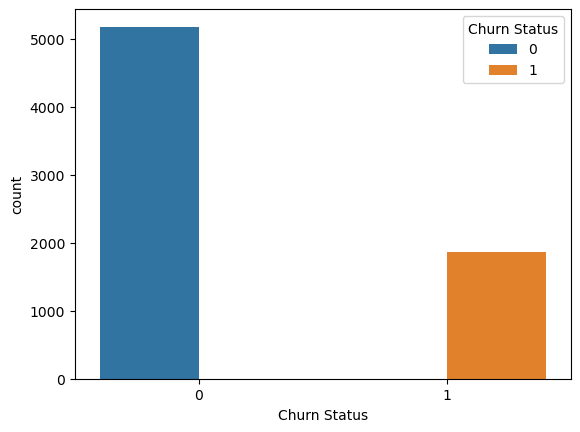

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.countplot(data=df, x='Churn Status', hue='Churn Status')

# Show the plot
plt.show()

In [11]:
df.value_counts('Churn Status')

Churn Status
0    5174
1    1869
dtype: int64

creating a new row Customer Churn to show if the customer has churned or not based on the churn status

In [12]:
# creating a new row
df['Customer Churn'] = df['Churn Status'].map({0: 'No', 1: 'Yes'})
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate,Customer Churn
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,Not rated,Yes
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,Not rated,Yes
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,Not rated,Yes
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0,Yes
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,90602,26265,1,2793,Price,Extra data charges,1,0,2.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,None,Yes,22.77,No,No,None,...,92285,2182,0,5306,None,None,0,0,Not rated,No
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,92301,18980,0,2140,None,None,2,0,Not rated,No
7040,2234-XADUH,Yes,4,72,None,Yes,29.66,Yes,Yes,Cable,...,92304,42,0,5560,None,None,2,0,4.0,No
7041,4801-JZAZL,Yes,1,11,None,No,0.00,No,Yes,DSL,...,92305,301,0,2793,None,None,0,0,Not rated,No


To obtain numeric and categorical columns separately from a datasetTo obtain numeric and categorical columns separately from a dataset based on the datatype

In [13]:
# categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'City', 'Churn Category', 'Churn Reason',
       'Customer Satisfaction rate', 'Customer Churn'],
      dtype='object')


In [14]:
#numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Regular Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges', 'Age',
       'Zip Code', 'Population', 'Churn Status', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported'],
      dtype='object')


Now plot a bar graph between the columns with respect to Customer churn to show how each factors will affect the Customer Churn

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_values = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
                      'Online Security', 'Online Backup', 'Device Protection Plan','Churn Category',
                      'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                      'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
                      'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married',
                      'Dependents', 'City']





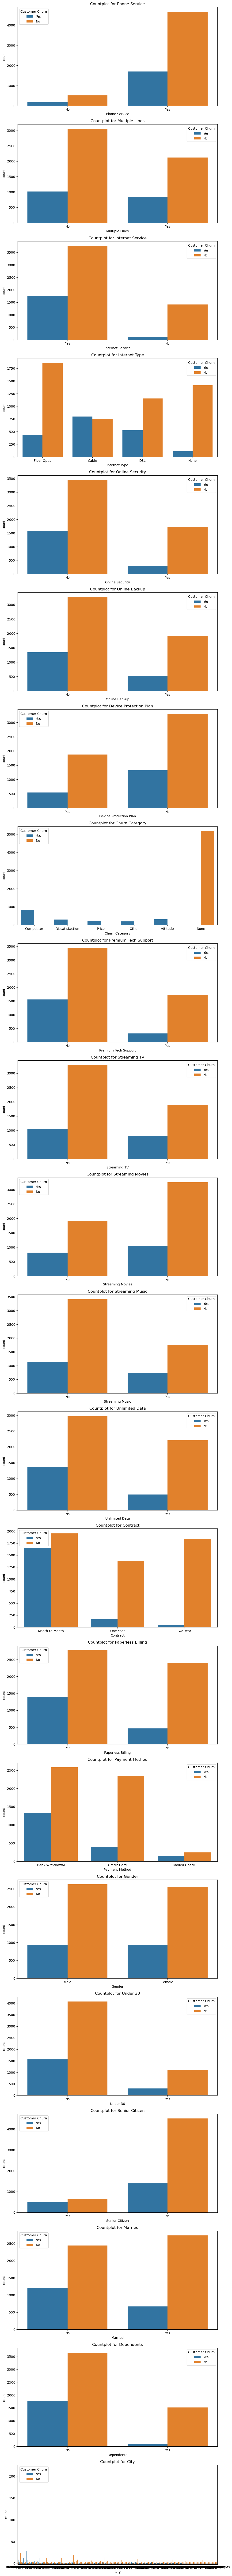

In [16]:
# Set up subplots based on the number of columns
num_cols = len(categorical_values)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))

# Loop through each column and create a countplot
for i, column in enumerate(categorical_values):
    sns.countplot(x=column, hue="Customer Churn", data=df, ax=axes[i])
    axes[i].set_title(f'Countplot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

From this graph what we could find is like 
In the case of internet type the customers with internet type cable are the customers who has churned more it means that some this is wrong with cable connection

In the case of online security we could find that Customers who have no online security is likely to churn

In the case of premium tech support we could find that Customers who have no premium tech support churnrate is high
 

In the payment method we could find that Customers who have payment method =back Withdrawal  churnrate is high compare to another payment methods

also we could find that customers with phone service there is a high churn rate

In the case of data set we could see the most of the peope are senior citizen

The main reason for most people to churn is maily the competitors

Here we are creating a new column for tenure in the name of tenure time here instaed of the numbers in months given in the data set we are grouping the data into duration  
'0-12 Months'
'12-24 Months'
'24-48 Months' 
'Over 48 Months'

In [17]:
def tenure_duration(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

df['tenure time'] = df['Tenure in Months'].apply(tenure_duration)


<AxesSubplot:xlabel='tenure time', ylabel='count'>

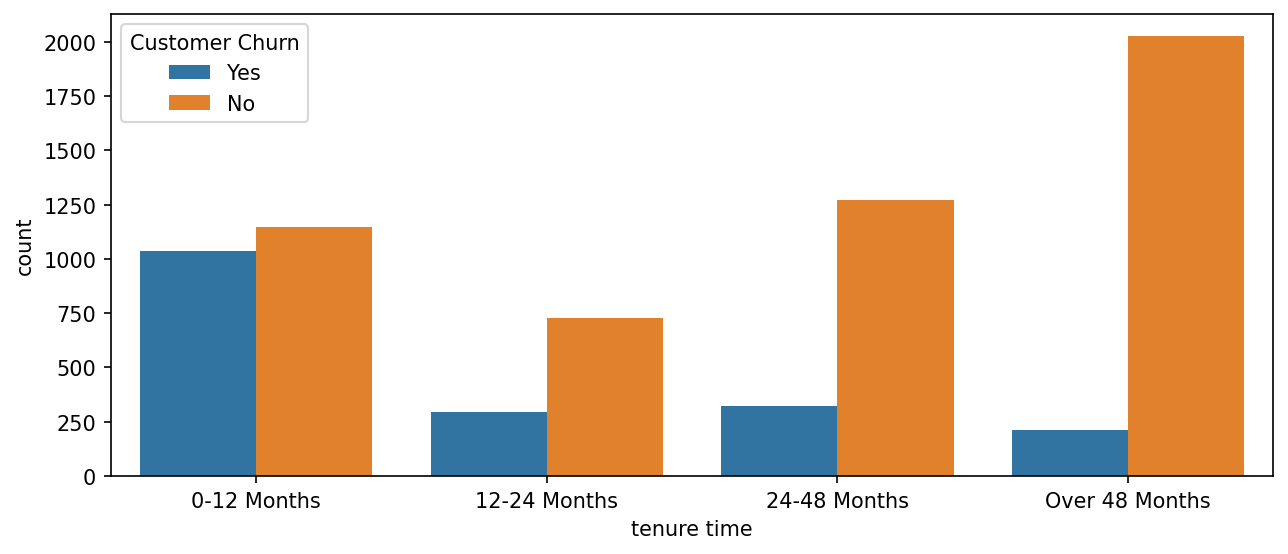

In [18]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=df,x='tenure time', hue='Customer Churn')

We chould find that give the longer the tenure time less is tthe churn rate which indicates that if long contact is been given then the customer is likely to stay

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_values = ['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Regular Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges', 'Age',
       'Zip Code', 'Population', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate']



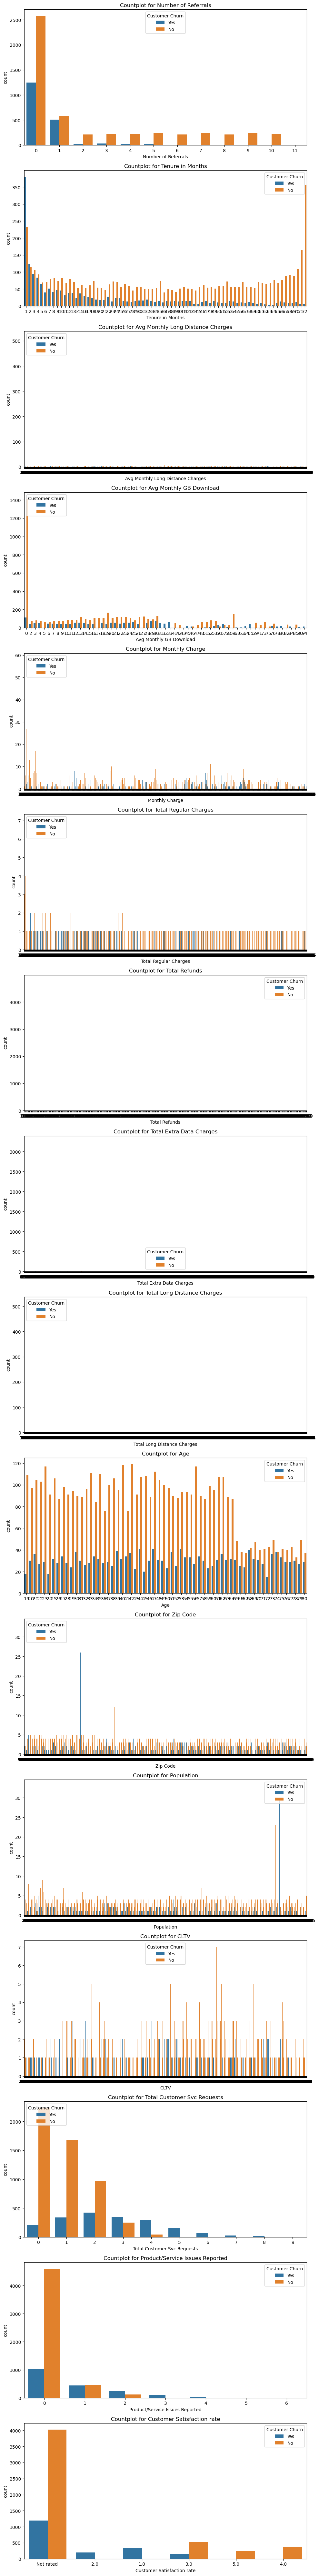

In [20]:
# Set up subplots based on the number of columns
num_cols = len(numeric_values)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))

# Loop through each column and create a histogram
for i, column in enumerate(numeric_values):
    sns.countplot(x=column, hue="Customer Churn", data=df, ax=axes[i])
    axes[i].set_title(f'Countplot for {column}')


# Adjust layout
plt.tight_layout()
plt.show()


From this graph what we could find is like 

In the case of service request the higher the service request the higher the customer is likely to churn 

In the case of product /Serivce the higher the service request the higher the customer is likely to churn 

In the case of monthly charge we could see that in some cases it have lead to customer churn

In the case of Number of referrals higher the referal lows is the churn rate

Customer Satisfaction plays an important role like a large number of customers are unsatisfied with the company 

Some Solution to the problems identified

Customer Contentment:
Surveys and feedback  tools should be used for identifying particular pain points.
Take initiative to address and resolve client complaints in order to raise general satisfaction.

Internet Type (Cable):
Examine and enhance the cable internet service's dependability and quality.
To keep cable internet users, think about providing discounts or other incentives.

Competitive Factors:
Examine competitors' offerings to see what draws in customers.
Improve your offerings or include extra perks to stay competitive.

Product/Service and Service Request:

Simplify and enhance the processes for product/service and service requests.
Assure prompt and satisfactory handling of client complaints.
we should be able to solve the issues as soon as possible so that the customer is happy with it

Online Security:
Customers should be informed and encouraged about the value of online security.
To promote sign-ups, offer reasonably priced online security features or packages.

Premium Tech Support:
highlight and emphasize the benefits of high-end tech support services.
If you want to draw in additional clients, think about providing special offers or free trials for premium tech assistance.

Payment Method (Back Withdrawal):
Examine the problems associated with bank withdrawal and take immediate action.
Provide a variety of payment choices and encourage the adoption of dependable substitutes.

In [21]:
#feature selection

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original data
df1 = df.copy()

# Define a list of categorical column names
categorical_columns = [
    'Customer ID', 'Referred a Friend', 'Offer', 'Phone Service',
    'Multiple Lines', 'Internet Service', 'Internet Type',
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
    'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
    'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married',
    'Dependents', 'City', 'Churn Category', 'Churn Reason',
    'Customer Satisfaction rate'
]

# Initialize a label encoder
label_encoder = LabelEncoder()

# Preprocess each categorical column
for column in categorical_columns:
    # Fill NaN values with a placeholder string ('missing')
    df1[column] = df1[column].fillna('missing').astype(str)
    # Encode the column
    df1[column] = label_encoder.fit_transform(df1[column])

# Now, 'df1' contains the encoded values for your categorical columns
df1

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate,Customer Churn,tenure time
0,6207,0,0,1,0,0,0.00,0,1,2,...,68701,1,5433,1,5,5,0,5,Yes,0-12 Months
1,5305,1,1,8,5,1,48.85,1,1,0,...,55668,1,5302,1,3,5,0,5,Yes,0-12 Months
2,1129,0,0,18,4,1,11.33,1,1,2,...,47534,1,3179,1,3,1,0,5,Yes,12-24 Months
3,3208,1,1,25,3,1,19.76,0,1,2,...,27778,1,5337,2,11,1,1,1,Yes,24-48 Months
4,3419,1,1,37,3,1,6.33,1,1,0,...,26265,1,2793,5,8,1,0,1,Yes,24-48 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1758,0,0,72,0,1,22.77,0,0,3,...,2182,0,5306,3,15,0,0,5,No,Over 48 Months
7039,4853,1,1,24,3,1,36.05,1,1,1,...,18980,0,2140,3,15,2,0,5,No,12-24 Months
7040,1525,1,4,72,0,1,29.66,1,1,0,...,42,0,5560,3,15,2,0,3,No,Over 48 Months
7041,3367,1,1,11,0,0,0.00,0,1,1,...,301,0,2793,3,15,0,0,5,No,0-12 Months


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Extract features (X) and target variable (y)
X = df1[['Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Zip Code',
       'Population', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate']]  # Features
y = df1['Customer Churn']  # Target variable



 

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print feature importances
imp_fe = []
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
imp_fe = feature_importances.tolist()
print("Feature Importances:")
print(feature_importances)

Feature Importances:
Referred a Friend                    0.003578
Number of Referrals                  0.022851
Tenure in Months                     0.028743
Offer                                0.008841
Phone Service                        0.000039
Avg Monthly Long Distance Charges    0.012632
Multiple Lines                       0.000515
Internet Service                     0.000000
Internet Type                        0.035028
Avg Monthly GB Download              0.022248
Online Security                      0.002302
Online Backup                        0.006869
Device Protection Plan               0.001076
Premium Tech Support                 0.005361
Streaming TV                         0.000829
Streaming Movies                     0.001403
Streaming Music                      0.004080
Unlimited Data                       0.011249
Contract                             0.091322
Paperless Billing                    0.000921
Payment Method                       0.001307
Monthly Charg

#calculation

Percentage Importance for Feature

X=( Importance Score of Feature X/sum of importance Score of Feature X
 )×100

This normalization ensures that the sum of all feature importances adds up to 100%.

For example, if a feature has an importance score of 0.05 and the sum of all importance scores is 0.5, the percentage importance of that feature would be 
0.05
0.5
× 100

=
10
%
0.5
0.05
​
 ×100=10%.

In [25]:
list1 = []

# Assuming feature_importances is a DataFrame or Series with feature names as index and importances as values
sum_feature_importances = feature_importances.sum()

# Normalize the feature importances to percentages and store in imp_fe list
imp_fe = (feature_importances / sum_feature_importances * 100).tolist()

# Append the normalized importances to list1
list1.extend(zip(feature_importances.index, imp_fe))

# Sort list1 in descending order based on importances
list1_sorted = sorted(list1, key=lambda x: x[1], reverse=True)

# Print the sorted elements with feature names
for feature, sorted_importance in list1_sorted:
   print(f"{feature}: {sorted_importance:.2f}%")

Total Customer Svc Requests: 29.31%
Customer Satisfaction rate: 14.95%
Contract: 9.13%
Monthly Charge: 5.47%
Product/Service Issues Reported: 4.19%
Internet Type: 3.50%
Senior Citizen: 3.01%
Tenure in Months: 2.87%
Zip Code: 2.68%
Total Regular Charges: 2.44%
CLTV: 2.32%
Number of Referrals: 2.29%
Population: 2.28%
Avg Monthly GB Download: 2.22%
City: 2.00%
Total Long Distance Charges: 1.37%
Age: 1.30%
Total Extra Data Charges: 1.28%
Avg Monthly Long Distance Charges: 1.26%
Unlimited Data: 1.12%
Offer: 0.88%
Online Backup: 0.69%
Dependents: 0.67%
Premium Tech Support: 0.54%
Streaming Music: 0.41%
Referred a Friend: 0.36%
Total Refunds: 0.32%
Gender: 0.24%
Online Security: 0.23%
Streaming Movies: 0.14%
Payment Method: 0.13%
Device Protection Plan: 0.11%
Paperless Billing: 0.09%
Streaming TV: 0.08%
Multiple Lines: 0.05%
Married: 0.05%
Phone Service: 0.00%
Internet Service: 0.00%
Under 30: 0.00%


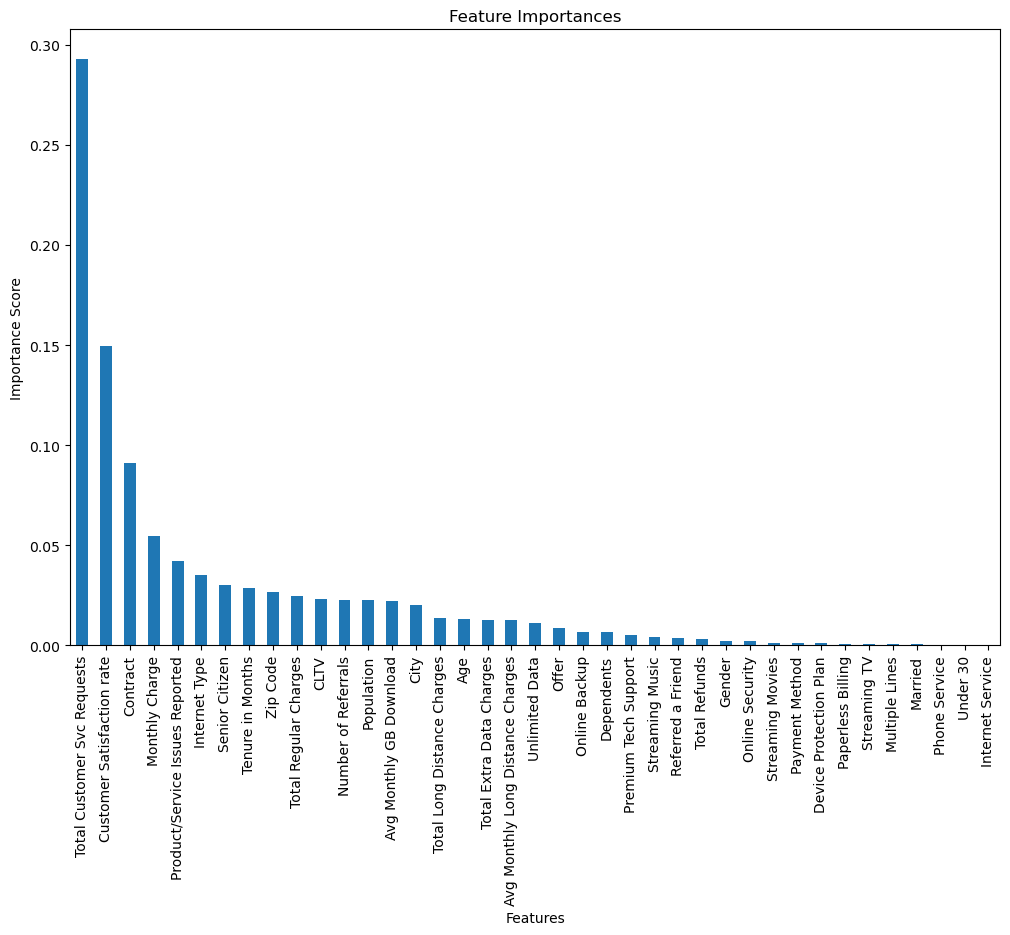

In [26]:
import matplotlib.pyplot as plt

# Assuming 'feature_importances' is the series containing importances

# Sort feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


This shows how much each attributes contribute or affect the target variable 

In [27]:
correlation_matrix = df1.corr()

# Print correlation with the target variable
print(correlation_matrix['Churn Status'].sort_values(ascending=False))


Churn Status                         1.000000
Total Customer Svc Requests          0.536605
Product/Service Issues Reported      0.399422
Monthly Charge                       0.232339
Internet Service                     0.227890
Paperless Billing                    0.191825
Senior Citizen                       0.150889
Offer                                0.120158
Age                                  0.115760
Avg Monthly GB Download              0.094932
Streaming TV                         0.063228
Streaming Movies                     0.061382
Population                           0.051649
Streaming Music                      0.045587
Multiple Lines                       0.040102
City                                 0.037210
Phone Service                        0.011942
Avg Monthly Long Distance Charges    0.008120
Total Extra Data Charges             0.006227
Gender                              -0.008612
Zip Code                            -0.016289
Customer ID                       

This shows the correlation of each attributes to the target variable also shows if its postive or negative correlated

Now select the main features and put this this a new dataframe

In [28]:
selected_columns = ['Total Customer Svc Requests',
    'Customer Satisfaction rate',
    'Contract',
    'Monthly Charge',
    'Product/Service Issues Reported',
    'Internet Type',
    'Senior Citizen',
    'Tenure in Months',
    'Total Regular Charges',
    'CLTV',
    'Number of Referrals',
    'Population','Customer Churn']
# Assuming 'df' is your DataFrame
df2 = df1[selected_columns].copy()


# Display the updated DataFrame
df2

,Total Customer Svc Requests,Customer Satisfaction rate,Contract,Monthly Charge,Product/Service Issues Reported,Internet Type,Senior Citizen,Tenure in Months,Total Regular Charges,CLTV,Number of Referrals,Population,Customer Churn
0,5,5,0,41.236,0,2,1,1,39.65,5433,0,68701,Yes
1,5,5,0,83.876,0,0,1,8,633.30,5302,1,55668,Yes
2,1,5,0,99.268,0,2,1,18,1752.55,3179,0,47534,Yes
3,1,1,0,102.440,1,2,1,25,2514.50,5337,1,27778,Yes
4,1,1,0,79.560,0,0,1,37,2868.15,2793,1,26265,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,5,2,21.150,0,3,0,72,1419.40,5306,0,2182,No
7039,2,5,1,84.800,0,1,0,24,1990.50,2140,1,18980,No
7040,2,3,1,103.200,0,0,0,72,7362.90,5560,4,42,No
7041,0,5,0,29.600,0,1,0,11,346.45,2793,1,301,No


 Ml Model

logistic regression

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Extract features (X) and target variable (y)
X = df2[['Total Customer Svc Requests',
    'Customer Satisfaction rate',
    'Contract',
    'Monthly Charge',
    'Product/Service Issues Reported',
    'Internet Type',
    'Senior Citizen',
    'Tenure in Months',
    'Total Regular Charges',
    'CLTV',
    'Number of Referrals',
    'Population']]  # Features
y = df2['Customer Churn']  # Target variable


In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.88829787 0.87943262 0.89361702 0.88829787 0.91296625 0.88099467
 0.88987567 0.90408526 0.88454707 0.91474245]
Mean Accuracy: 0.89368567577441


In [31]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)


In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



Accuracy: 0.8743789921930447

Confusion Matrix:
[[957  52]
 [125 275]]

Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.95      0.92      1009
         Yes       0.84      0.69      0.76       400

    accuracy                           0.87      1409
   macro avg       0.86      0.82      0.84      1409
weighted avg       0.87      0.87      0.87      1409



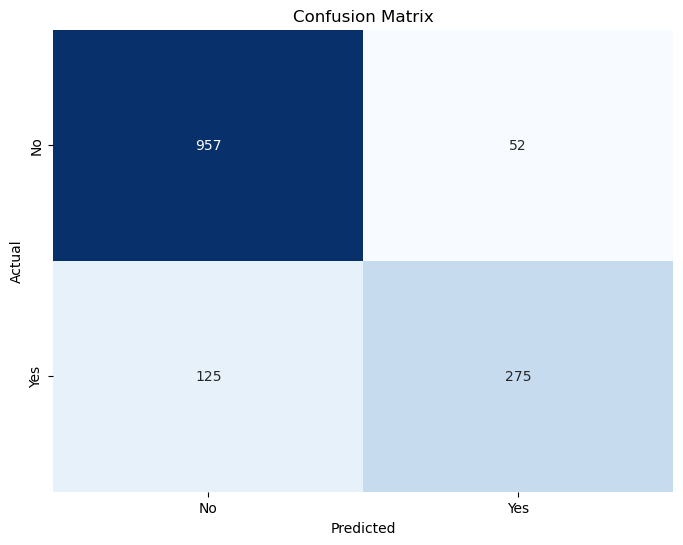

In [33]:
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Plot the confusion matrix (for illustration purposes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

precision=TP/TP+FP

recall =TP/TP+FN

F1=2*p*r/p+r


support is the number of actual occurrences of the class in the specisupport is fied dataset

DecisionTree

In [34]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Extract features (X) and target variable (y)
X = df2[['Total Customer Svc Requests',
    'Customer Satisfaction rate',
    'Contract',
    'Monthly Charge',
    'Product/Service Issues Reported',
    'Internet Type',
    'Senior Citizen',
    'Tenure in Months',
    'Total Regular Charges',
    'CLTV',
    'Number of Referrals',
    'Population']]  # Features
y = df2['Customer Churn']  # Target variable


In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Fit the decision tree model to the training data
tree_model.fit(X_train, y_train)

# Make predictions using the decision tree model
y_pred_tree = tree_model.predict(X_test)


Cross-Validation Scores: [0.88297872 0.85638298 0.87588652 0.86347518 0.88277087 0.88454707
 0.87744227 0.89875666 0.88632327 0.87921847]
Mean Accuracy: 0.878778201882015



Decision Tree Model:
Accuracy: 0.8637331440738112

Confusion Matrix:
[[911  98]
 [ 94 306]]

Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.90      0.90      1009
         Yes       0.76      0.77      0.76       400

    accuracy                           0.86      1409
   macro avg       0.83      0.83      0.83      1409
weighted avg       0.86      0.86      0.86      1409



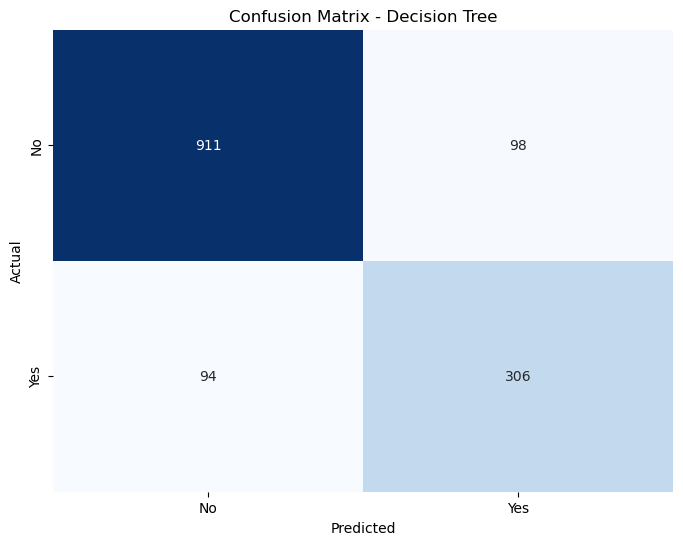

In [36]:
# Evaluate the decision tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

print("\nDecision Tree Model:")
print(f'Accuracy: {accuracy_tree}')
print('\nConfusion Matrix:')
print(conf_matrix_tree)
print('\nClassification Report:')
print(classification_rep_tree)

# Plot the confusion matrix for the decision tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=tree_model.classes_, yticklabels=tree_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

RandomForestClassifier

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Extract features (X) and target variable (y)
X = df2[['Total Customer Svc Requests',
    'Customer Satisfaction rate',
    'Contract',
    'Monthly Charge',
    'Product/Service Issues Reported',
    'Internet Type',
    'Senior Citizen',
    'Tenure in Months',
    'Total Regular Charges',
    'CLTV',
    'Number of Referrals',
    'Population']]  # Features
y = df2['Customer Churn']  # Target variable


In [38]:
# Initialize the random forest classifier
forest_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(forest_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Fit the random forest model to the training data
forest_model.fit(X_train, y_train)

# Make predictions using the random forest model
y_pred_forest = forest_model.predict(X_test)


Cross-Validation Scores: [0.90505768 0.92102928 0.92546584 0.93078971 0.92628774]
Mean Accuracy: 0.9217260492891265



Random Forest Model:
Accuracy: 0.907735982966643

Confusion Matrix:
[[976  33]
 [ 97 303]]

Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.97      0.94      1009
         Yes       0.90      0.76      0.82       400

    accuracy                           0.91      1409
   macro avg       0.91      0.86      0.88      1409
weighted avg       0.91      0.91      0.91      1409



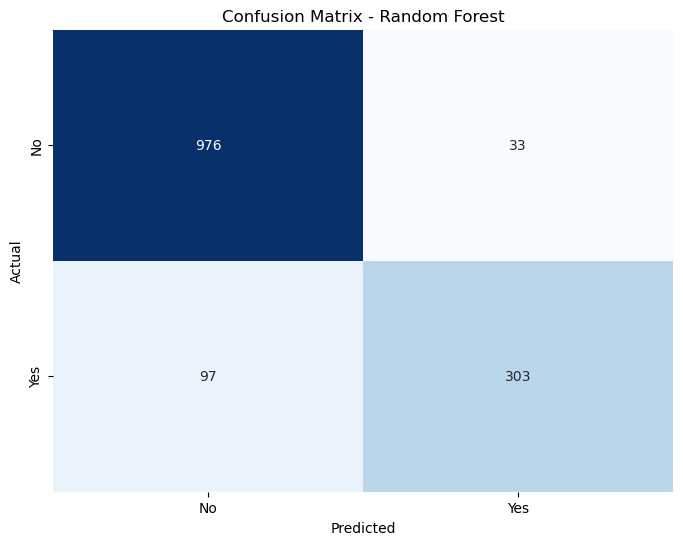

In [39]:
# Evaluate the random forest model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
classification_rep_forest = classification_report(y_test, y_pred_forest)

print("\nRandom Forest Model:")
print(f'Accuracy: {accuracy_forest}')
print('\nConfusion Matrix:')
print(conf_matrix_forest)
print('\nClassification Report:')
print(classification_rep_forest)

# Plot the confusion matrix for the random forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=forest_model.classes_, yticklabels=forest_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

SVM

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Extract features (X) and target variable (y)
X = df2[['Total Customer Svc Requests',
    'Customer Satisfaction rate',
    'Contract',
    'Monthly Charge',
    'Product/Service Issues Reported',
    'Internet Type',
    'Senior Citizen',
    'Tenure in Months',
    'Total Regular Charges',
    'CLTV',
    'Number of Referrals',
    'Population']]  # Features
y = df2['Customer Churn']  # Target variable

In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Perform 5-fold cross-validation on scaled data
cv_scores_svm = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)

# Print the cross-validation scores
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("Mean Accuracy:", cv_scores_svm.mean())

# Fit the SVM model to the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions using the SVM model
y_pred_svm = svm_model.predict(X_test_scaled)

SVM Cross-Validation Scores: [0.88287489 0.89973381 0.90860692 0.9068323  0.89875666]
Mean Accuracy: 0.899360915112821



SVM Model:
Accuracy: 0.872959545777147

Confusion Matrix:
[[952  57]
 [122 278]]

Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.94      0.91      1009
         Yes       0.83      0.69      0.76       400

    accuracy                           0.87      1409
   macro avg       0.86      0.82      0.84      1409
weighted avg       0.87      0.87      0.87      1409



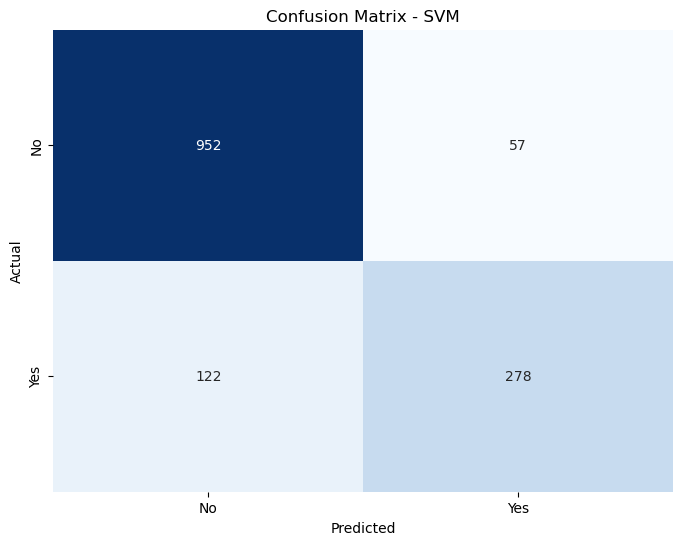

In [42]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("\nSVM Model:")
print(f'Accuracy: {accuracy_svm}')
print('\nConfusion Matrix:')
print(conf_matrix_svm)
print('\nClassification Report:')
print(classification_rep_svm)

# Plot the confusion matrix for the SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()
